In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer, Rotator
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

plt.style.use('seaborn-v0_8-whitegrid')

# Parte 1: Carga y exploración de datos

In [2]:
df = pd.read_csv("../data/customer_satisfaction_data.csv")

In [3]:
df

customer_id  quarter survey_date  account_manager_responsive  \
0       CUST_001  Q1_2024  2024-03-22                         5.0   
1       CUST_002  Q1_2024  2024-03-20                         5.0   
2       CUST_003  Q1_2024  2024-03-17                         4.0   
3       CUST_004  Q1_2024  2024-03-08                         3.0   
4       CUST_005  Q1_2024  2024-03-12                         5.0   
...          ...      ...         ...                         ...   
3395    CUST_846  Q4_2024  2024-12-16                         4.0   
3396    CUST_847  Q4_2024  2024-12-14                         3.0   
3397    CUST_848  Q4_2024  2024-12-16                         3.0   
3398    CUST_849  Q4_2024  2024-12-19                         5.0   
3399    CUST_850  Q4_2024  2024-12-10                         3.0   

      billing_accuracy  budget_control  change_management  \
0                  6.0             4.0                5.0   
1                  3.0             4.0                5.0   
2                  3.0             4.0                3.0   
3                  4.0             4.0                3.0   
4                  5.0             5.0                4.0   
...                ...             ...                ...   
3395               6.0             4.0                5.0   
3396               5.0             4.0                3.0   
3397               3.0             6.0                5.0   
3398               4.0             4.0                3.0   
3399               4.0             3.0                3.0   

      communication_clarity  competitive_pricing  cost_transparency  ...  \
0                       4.0                  5.0                5.0  ...   
1                       5.0                  3.0                3.0  ...   
2                       4.0                  4.0                3.0  ...   
3                       2.0                  3.0                4.0  ...   
4                       5.0                  4.0                3.0  ...   
...                     ...                  ...                ...  ...   
3395                    5.0                  4.0                3.0  ...   
3396                    4.0                  3.0                4.0  ...   
3397                    4.0                  4.0                4.0  ...   
3398                    3.0                  5.0                4.0  ...   
3399                    2.0                  5.0                4.0  ...   

      technical_expertise  timeline_adherence  training_quality  \
0                     4.0                 4.0               2.0   
1                     4.0                 4.0               4.0   
2                     4.0                 4.0               3.0   
3                     4.0                 4.0               4.0   
4                     6.0                 5.0               4.0   
...                   ...                 ...               ...   
3395                  5.0                 4.0               5.0   
3396                  3.0                 4.0               2.0   
3397                  6.0                 6.0               4.0   
3398                  4.0                 4.0               3.0   
3399                  4.0                 4.0               4.0   

      trust_reliability  value_for_money  overall_satisfaction  nps_score  \
0                   6.0              6.0                     4          6   
1                   4.0              4.0                     4          5   
2                   4.0              3.0                     3          4   
3                   2.0              4.0                     4          5   
4                   5.0              4.0                     5          5   
...                 ...              ...                   ...        ...   
3395                4.0              5.0                     4          5   
3396                5.0              5.0                     4          6   
3397                5.0         

In [4]:
features = [
    # Technical Excellence & Innovation
    "technical_expertise",
    "problem_solving",
    "innovation_solutions",
    "technical_documentation",
    "system_integration",

    # Relationship Management & Communication
    "account_manager_responsive",
    "executive_access",
    "trust_reliability",
    "long_term_partnership",
    "communication_clarity",

    # Project Delivery & Quality
    "project_management",
    "timeline_adherence",
    "budget_control",
    "quality_deliverables",
    "change_management",

    # Value & Financial Transparency
    "cost_transparency",
    "value_for_money",
    "roi_demonstration",
    "competitive_pricing",
    "billing_accuracy",

    # Support & Service Excellence
    "support_responsiveness",
    "training_quality",
    "documentation_help"
]
outcome_cols = [
    "overall_satisfaction",
    "nps_score",
    "renewal_likelihood",
    "revenue_growth_pct",
    "referrals_generated"
]


In [5]:
print("Valores faltantes por variable:")
print(df.isnull().sum())


Valores faltantes por variable:
customer_id                    0
quarter                        0
survey_date                    0
account_manager_responsive    16
billing_accuracy              13
budget_control                17
change_management             12
communication_clarity         16
competitive_pricing           15
cost_transparency             10
documentation_help            14
executive_access              10
innovation_solutions          10
long_term_partnership         14
problem_solving               20
project_management            17
quality_deliverables          13
roi_demonstration             17
support_responsiveness        17
system_integration            14
technical_documentation       19
technical_expertise            9
timeline_adherence             8
training_quality              17
trust_reliability             22
value_for_money               15
overall_satisfaction           0
nps_score                      0
renewal_likelihood             0
revenue_gro

In [6]:
porcentajes_faltantes = (df.isnull().sum() / len(df)) * 100


porcentajes_ordenados = porcentajes_faltantes.sort_values(ascending=False)


print("\nPorcentaje de faltantes por variable (Ordenado de Mayor a Menor):")
print(porcentajes_ordenados)


Porcentaje de faltantes por variable (Ordenado de Mayor a Menor):
trust_reliability             0.647059
problem_solving               0.588235
technical_documentation       0.558824
project_management            0.500000
support_responsiveness        0.500000
budget_control                0.500000
training_quality              0.500000
roi_demonstration             0.500000
account_manager_responsive    0.470588
communication_clarity         0.470588
value_for_money               0.441176
competitive_pricing           0.441176
system_integration            0.411765
documentation_help            0.411765
long_term_partnership         0.411765
quality_deliverables          0.382353
billing_accuracy              0.382353
change_management             0.352941
innovation_solutions          0.294118
cost_transparency             0.294118
executive_access              0.294118
technical_expertise           0.264706
timeline_adherence            0.235294
customer_id                   0.0000

<Axes: >

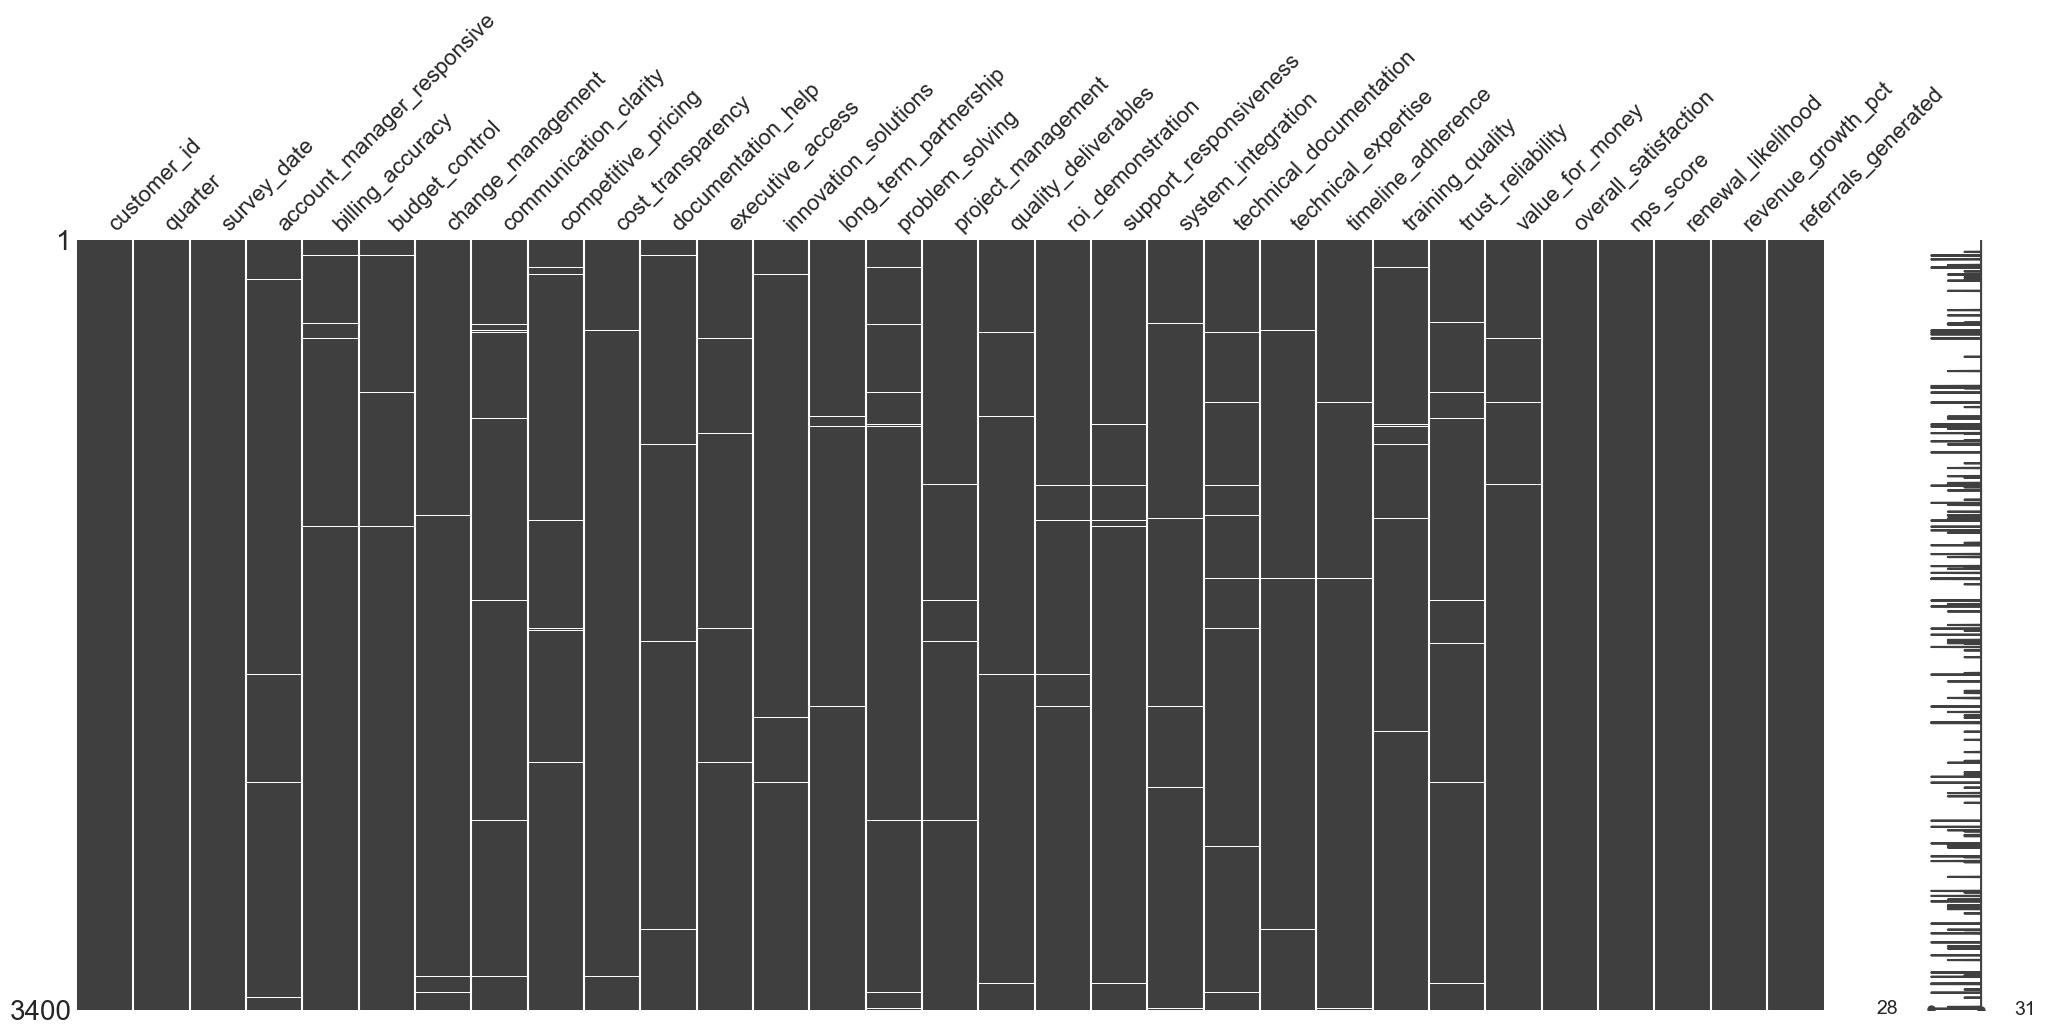

In [7]:
msno.matrix(df)


Initial inspection suggests no discernible pattern in the missing data, leading to the inference that the data are Missing Completely at Random (MCAR). Consequently, listwise deletion (via df.dropna()) was deemed an acceptable, albeit conservative, method for handling missing values.

In [8]:
datos = df.dropna()
datos_obj = [outcome_cols]
datos = datos[features]

In [9]:
datos.describe()

technical_expertise  problem_solving  innovation_solutions  \
count          3235.000000      3235.000000           3235.000000   
mean              4.112828         4.110974              4.107573   
std               0.978719         0.991797              0.985762   
min               1.000000         1.000000              1.000000   
25%               4.000000         3.000000              3.000000   
50%               4.000000         4.000000              4.000000   
75%               5.000000         5.000000              5.000000   
max               7.000000         7.000000              7.000000   

       technical_documentation  system_integration  \
count              3235.000000         3235.000000   
mean                  4.116847            4.117774   
std                   0.988779            1.010172   
min                   1.000000            1.000000   
25%                   3.000000            3.000000   
50%                   4.000000            4.000000   
75%                   5.000000            5.000000   
max                   7.000000            7.000000   

       account_manager_responsive  executive_access  trust_reliability  \
count                 3235.000000       3235.000000        3235.000000   
mean                     4.112519          4.115920           4.100155   
std                      0.973845          0.972334           0.963712   
min                      1.000000          1.000000           1.000000   
25%                      3.000000          4.000000           3.000000   
50%                      4.000000          4.000000           4.000000   
75%                      5.000000          5.000000           5.000000   
max                      7.000000          7.000000           7.000000   

       long_term_partnership  communication_clarity  ...  \
count            3235.000000            3235.000000  ...   
mean                4.102937               4.096445  ...   
std                 0.975064               0.966333  ...   
min                 1.000000               1.000000  ...   
25%                 3.000000               3.000000  ...   
50%                 4.000000               4.000000  ...   
75%                 5.000000               5.000000  ...   
max                 7.000000               7.000000  ...   

       quality_deliverables  change_management  cost_transparency  \
count           3235.000000        3235.000000        3235.000000   
mean               4.128903           4.113138           4.098609   
std                0.980523           0.976944           0.978043   
min                1.000000           1.000000           1.000000   
25%                3.000000           3.000000           3.000000   
50%                4.000000           4.000000           4.000000   
75%                5.000000           5.000000           5.000000   
max                7.000000           7.000000           7.000000   

       value_for_money  roi_demonstration  competitive_pricing  \
count      3235.000000        3235.000000          3235.000000   
mean          4.097372           4.068315             4.081917   
std           0.978483           0.943339             0.975788   
min           1.000000           1.000000             1.000000   
25%           3.000000           3.000000             3.000000   
50%           4.000000           4.000000             4.000000   
75%           5.000000           5.000000             5.000000   
max           7.000000           7.000000             7.000000   

       billing_accuracy  support_responsiveness  training_quality  \
count       3235.000000             3235.000000       3235.000000   
mean           4.106337                4.079753          4.074189   
std            0.964974                0.980550          0.997863   
min            1.000000                1.000000          1.000000   
25%            3.000000                3.000000          3.000000   
50%            4.000000                4.000000          4.

In [10]:
datos_obj

[['overall_satisfaction',
  'nps_score',
  'renewal_likelihood',
  'revenue_growth_pct',
  'referrals_generated']]

In [11]:
scaler = StandardScaler()
datos_num = scaler.fit_transform(datos)

kmo_all, kmo_model = calculate_kmo(datos)
print("KMO per variable:")
print(kmo_all)

print("\nGeneral KMO:")
print(round(kmo_model, 3))

KMO per variable:
[0.96216068 0.9593167  0.95763693 0.96199268 0.96082456 0.96453427
 0.96055519 0.95889361 0.95772204 0.96255522 0.96239412 0.96542158
 0.96737382 0.96568958 0.96611371 0.94194211 0.95241072 0.94202107
 0.94129346 0.9333241  0.95536554 0.95469031 0.95426624]

General KMO:
0.959


In [12]:
corr = datos.corr()

In [13]:
from src.utils import generate_correlation_heatmap, generate_scree_plot, generate_factor_loadings_plot

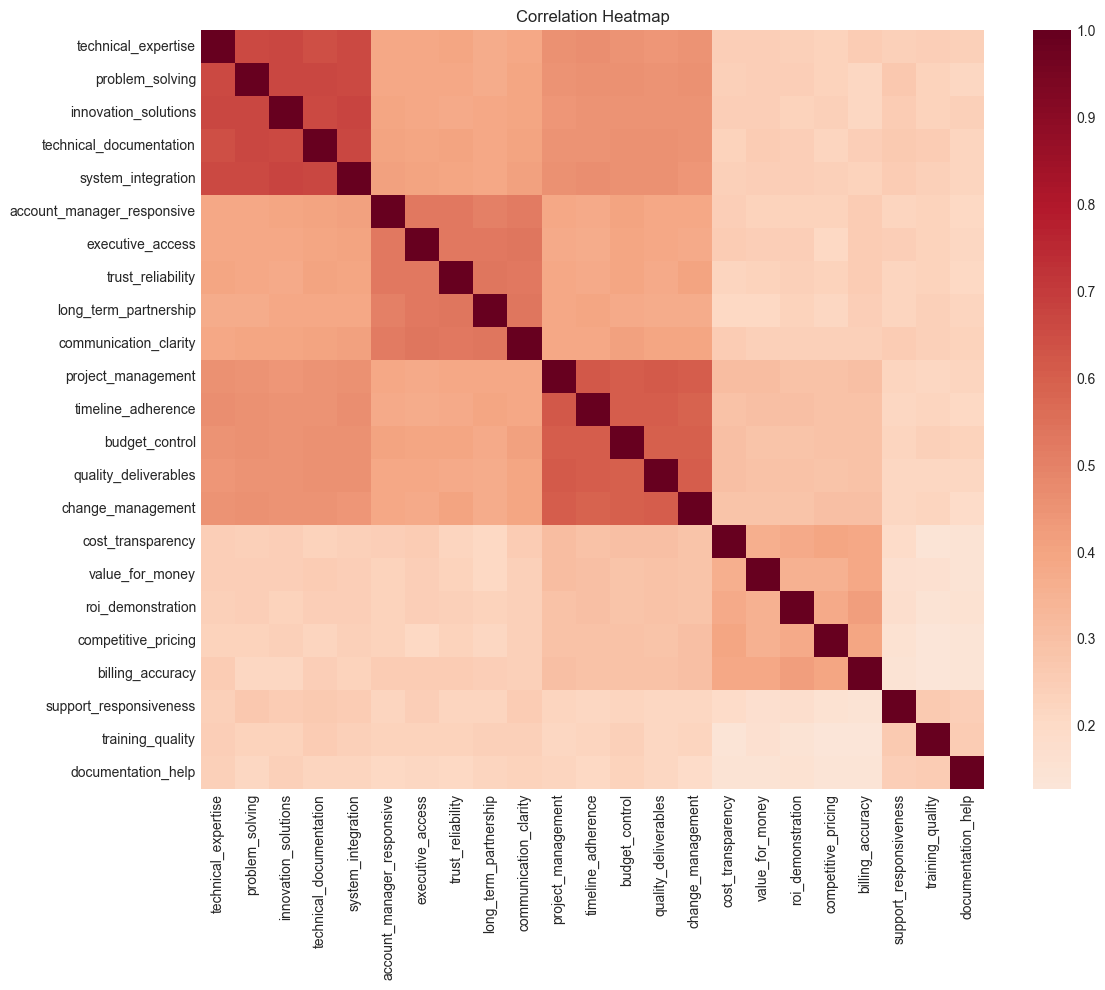

In [14]:
generate_correlation_heatmap(datos)

In [16]:
ratio = datos.shape[0] / datos.shape[1]
print(f"Ratio de muestras por variable: {ratio:.1f}")

Ratio de muestras por variable: 140.7


**Is the data suitable for factor analysis?**
Yes, the data is suitable for factor analysis because both the general KMO value and the independent values for each feature are very close to 1, the number of observations is greater than 200 and the ratio between variables and observations is approximately 140:1. These results show that variables have a high proportion of its common variance. In addition to this, the percentage of strong correlations between variables (48.2 %) is greater than 30% which also makes this data suitable for factor analysis because it show that variables move together.

**What do the initial patterns suggest about underlying factors?**

The initial patterns indicate the presence of underlying factors, as several groups of variables are highly inter-correlated. While three factors appear to be the most prominent, a visual inspection suggests that up to five factors may exist.

# Parte 2: Extracción y Determinación de Factores 

In [ ]:
factor_eigenval = FactorAnalyzer(n_factors= 10, rotation=None)
factor_eigenval.fit(datos_num)
eigenvalores, vectores = factor_eigenval.get_eigenvalues()
print("=== Eigenvalores obtenidos ===")
for i, val in enumerate(eigenvalores, 1):
    print(f"Factor {i}: Eigenvalor = {val:.3f}")

factores_significativos = eigenvalores[eigenvalores > 1]
n_factores = len(factores_significativos)

varianza_total = sum(eigenvalores)
varianza_explicada = sum(factores_significativos)

porcentaje_explicado = (varianza_explicada / varianza_total) * 100

print(f"\nNúmero de factores significativos: {n_factores}")
print(f"Suma de eigenvalores significativos: {varianza_explicada:.3f}")
print(f"Varianza total: {varianza_total:.3f}")
print(f"Porcentaje de varianza explicada: {porcentaje_explicado:.2f}%")

c:\Users\eduar\Documents\Github julio\FA\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


=== Eigenvalores obtenidos ===
Factor 1: Eigenvalor = 8.747
Factor 2: Eigenvalor = 1.776
Factor 3: Eigenvalor = 1.425
Factor 4: Eigenvalor = 1.204
Factor 5: Eigenvalor = 1.073
Factor 6: Eigenvalor = 0.762
Factor 7: Eigenvalor = 0.741
Factor 8: Eigenvalor = 0.650
Factor 9: Eigenvalor = 0.642
Factor 10: Eigenvalor = 0.607
Factor 11: Eigenvalor = 0.580
Factor 12: Eigenvalor = 0.499
Factor 13: Eigenvalor = 0.468
Factor 14: Eigenvalor = 0.462
Factor 15: Eigenvalor = 0.460
Factor 16: Eigenvalor = 0.407
Factor 17: Eigenvalor = 0.402
Factor 18: Eigenvalor = 0.395
Factor 19: Eigenvalor = 0.372
Factor 20: Eigenvalor = 0.353
Factor 21: Eigenvalor = 0.338
Factor 22: Eigenvalor = 0.322
Factor 23: Eigenvalor = 0.314

Número de factores significativos: 5
Suma de eigenvalores significativos: 14.225
Varianza total: 23.000
Porcentaje de varianza explicada: 61.85%


c:\Users\eduar\Documents\Github julio\FA\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


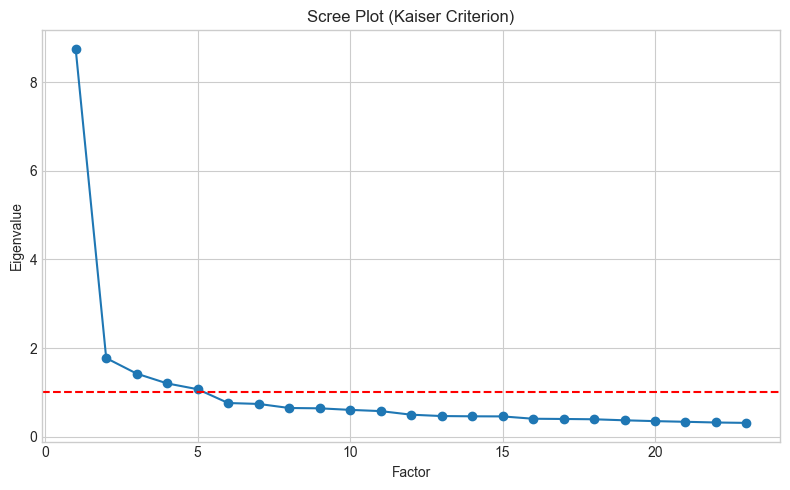

array([8.74685993, 1.77563642, 1.42490226, 1.20404905, 1.07331557,
       0.76191997, 0.74138077, 0.6496556 , 0.6423305 , 0.60717696,
       0.5798143 , 0.49881792, 0.46792665, 0.46205822, 0.45998594,
       0.40725677, 0.40203643, 0.39510156, 0.3719921 , 0.35331387,
       0.33843912, 0.32248731, 0.31354277])

In [19]:
generate_scree_plot(datos_num)

In [20]:
import plotly.graph_objects as go

def graficar_varianza_factorial(datos, titulo='Variance explained by signnificative factors'):
    eigenvalores, vectores = factor_eigenval.get_eigenvalues()

    eigenvalores_sig = eigenvalores[eigenvalores > 1]
    n_factores = len(eigenvalores_sig)

    explained_var = eigenvalores_sig / np.sum(eigenvalores)

    cum_var = np.cumsum(explained_var)

    components = np.arange(1, n_factores + 1)
    fig_var = go.Figure()

    fig_var.add_trace(go.Bar(
        x=components,
        y=explained_var,
        name='individual variance',
        marker_color='royalblue'
    ))

    fig_var.add_trace(go.Scatter(
        x=components,
        y=cum_var,
        name='Varianza acumulada',
        mode='lines+markers',
        line=dict(color='firebrick', width=3),
        marker=dict(size=8)
    ))

    fig_var.update_layout(
        title=titulo,
        xaxis_title='Significant Factor',
        yaxis_title='Fraction of variance',
        width=600,
        height=450
    )

    fig_var.show()

resultados = graficar_varianza_factorial(datos, titulo='Variance described by factor')


**Determine the optimal number of factors and justify your choice**

The scree plot confirms the initial analysis, indicating that five factors should be retained. This aligns with the Kaiser criterion, as five factors have eigenvalues greater than one (λ>1).

In [21]:
# --- Análisis factorial (extracción por ejes principales) ---
fa = FactorAnalyzer(n_factors=5, rotation=None, method='principal')
fa.fit(datos_num)

print("Initial factor loads:")
pd.DataFrame(fa.loadings_, index=datos.columns, columns=['Factor1','Factor2','Factor3','Factor4','Factor5'])

Initial factor loads:


c:\Users\eduar\Documents\Github julio\FA\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Factor1   Factor2   Factor3   Factor4   Factor5
technical_expertise         0.723729 -0.278081 -0.245051  0.190794 -0.137361
problem_solving             0.724095 -0.298315 -0.254534  0.188789 -0.143455
innovation_solutions        0.724250 -0.303629 -0.242894  0.209358 -0.145366
technical_documentation     0.728423 -0.293856 -0.220006  0.188927 -0.146695
system_integration          0.732234 -0.296732 -0.223312  0.187696 -0.154160
account_manager_responsive  0.640257 -0.075490  0.404342 -0.085127 -0.150753
executive_access            0.641139 -0.069128  0.432174 -0.061274 -0.140493
trust_reliability           0.642760 -0.079661  0.431780 -0.095101 -0.144894
long_term_partnership       0.628402 -0.094931  0.444450 -0.090272 -0.110605
communication_clarity       0.650541 -0.075651  0.419801 -0.064074 -0.105020
project_management          0.717700  0.066273 -0.169435 -0.333767  0.196512
timeline_adherence          0.717910  0.049855 -0.178355 -0.317467  0.181395
budget_control              0.720187  0.039179 -0.134859 -0.314933  0.201754
quality_deliverables        0.713924  0.052027 -0.171598 -0.329487  0.180218
change_management           0.711371  0.048446 -0.159053 -0.331363  0.170653
cost_transparency           0.463039  0.508820 -0.056925  0.150737 -0.082507
value_for_money             0.459738  0.473151 -0.057682  0.159675 -0.073427
roi_demonstration           0.461453  0.507177 -0.043266  0.172572 -0.100363
competitive_pricing         0.450434  0.517228 -0.077514  0.120132 -0.118396
billing_accuracy            0.464563  0.535899 -0.009812  0.113007 -0.158230
support_responsiveness      0.393395 -0.012561  0.154451  0.393922  0.397221
training_quality            0.381704 -0.049260  0.188464  0.308974  0.486436
documentation_help          0.363972 -0.020104  0.157981  0.315195  0.501161

In [22]:
df_no_rotado = pd.DataFrame(
    fa.loadings_,
    index=datos.columns,
    columns=[f'Factor{i+1}' for i in range(fa.loadings_.shape[1])]
)


def resaltar_cargas(s):

    es_significativo = abs(s) >= 0.4
    return ['background-color: yellow' if v else '' for v in es_significativo]

print("Loads Matrix")

df_formateado = (
    df_no_rotado
    .style
    .apply(resaltar_cargas, axis=0) 
    .format(precision=3)           
)

df_formateado

Loads Matrix


In [23]:
# --- Rotación Varimax ---
rotator = Rotator()
Lambda_rot = rotator.fit_transform(fa.loadings_)

print("Loads matrix after Varimax rotation:")
df_rotado = pd.DataFrame(Lambda_rot, index=datos.columns, columns=['Factor1','Factor2','Factor3','Factor4','Factor5'])
df_rotado

Loads matrix after Varimax rotation:


Factor1   Factor2   Factor3   Factor4   Factor5
technical_expertise         0.757526  0.147946  0.207738 -0.246551  0.129452
problem_solving             0.773461  0.132711  0.205557 -0.247413  0.122444
innovation_solutions        0.779306  0.133145  0.212472 -0.228658  0.134959
technical_documentation     0.758779  0.135500  0.235171 -0.237629  0.129181
system_integration          0.765723  0.136205  0.237234 -0.238274  0.123050
account_manager_responsive  0.212036  0.151489  0.702533 -0.194725  0.098561
executive_access            0.202293  0.158622  0.716738 -0.174635  0.125743
trust_reliability           0.197207  0.142145  0.726119 -0.196326  0.105213
long_term_partnership       0.182184  0.115982  0.720568 -0.194628  0.134452
communication_clarity       0.203832  0.149078  0.702788 -0.199270  0.151341
project_management          0.239510  0.211409  0.210822 -0.734613  0.109770
timeline_adherence          0.263039  0.206328  0.207774 -0.719262  0.105413
budget_control              0.244082  0.189900  0.238447 -0.712619  0.134008
quality_deliverables        0.252515  0.202975  0.213326 -0.722963  0.098661
change_management           0.249551  0.199387  0.225608 -0.714893  0.092823
cost_transparency           0.102228  0.673537  0.103140 -0.150064  0.093874
value_for_money             0.119239  0.642481  0.101989 -0.144028  0.106301
roi_demonstration           0.109972  0.680189  0.114635 -0.122669  0.094619
competitive_pricing         0.100595  0.677724  0.095343 -0.156961  0.041437
billing_accuracy            0.077793  0.699362  0.165707 -0.132768  0.025794
support_responsiveness      0.168460  0.141111  0.130813 -0.044449  0.651423
training_quality            0.104080  0.058763  0.146792 -0.119822  0.682303
documentation_help          0.091510  0.078074  0.104361 -0.123756  0.683865

In [24]:
UMBRAL_CORTE = 0.40

df_rotado = pd.DataFrame(
    Lambda_rot,
    index=datos.columns,
    columns=[f'Factor{i+1}' for i in range(Lambda_rot.shape[1])]
)

# --- 2. APLICAR FORMATO CONDICIONAL Y SUPRESIÓN ---

def formatear_cargas_rotadas(df, umbral):
    df_presentacion = df.copy()
    df_presentacion[np.abs(df_presentacion) < umbral] = np.nan

    def resaltar_alto(val):
        if pd.isna(val):
            return '' 
        return 'background-color: green' 

    print("Loads matrix after rotation:")
    

    df_final = (
        df_presentacion
        .style
        .applymap(resaltar_alto)           
        .format(precision=3, na_rep='')    
    )
    
    return df_final


matriz_final = formatear_cargas_rotadas(df_rotado, UMBRAL_CORTE)
matriz_final

Loads matrix after rotation:


C:\Users\eduar\AppData\Local\Temp\ipykernel_29772\4279034947.py:26: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



In [26]:
rotator = Rotator(method='promax')
Lambda_rot_1 = rotator.fit_transform(fa.loadings_) # Aplica la rotación a las cargas

print("Loads after Promax rotation:")
df_rotado = pd.DataFrame(Lambda_rot_1, index=datos.columns, columns=['Factor1','Factor2','Factor3','Factor4','Factor5'])
df_rotado

Loads after Promax rotation:


Factor1   Factor2   Factor3   Factor4   Factor5
technical_expertise         0.830817  0.010649 -0.009511 -0.025428  0.001806
problem_solving             0.853933 -0.007428 -0.013494 -0.025675 -0.006655
innovation_solutions        0.864231 -0.005051 -0.003397  0.004032  0.006938
technical_documentation     0.829973 -0.005081  0.028713 -0.009153 -0.000635
system_integration          0.839093 -0.004761  0.030340 -0.007809 -0.008635
account_manager_responsive  0.026455  0.012609  0.765114 -0.008558 -0.026120
executive_access            0.012713  0.022105  0.785616  0.022250  0.004389
trust_reliability           0.001034 -0.000724  0.798354 -0.011130 -0.019365
long_term_partnership      -0.018531 -0.030678  0.794081 -0.017302  0.017539
communication_clarity       0.007427  0.005042  0.759007 -0.013753  0.033450
project_management         -0.002602  0.016206 -0.005514 -0.830624  0.004489
timeline_adherence          0.034622  0.012688 -0.010034 -0.804736 -0.001421
budget_control              0.002455 -0.009232  0.032862 -0.795507  0.030395
quality_deliverables        0.019617  0.008765 -0.000029 -0.812759 -0.008399
change_management           0.016554  0.005704  0.019488 -0.801038 -0.015300
cost_transparency          -0.004314  0.704754 -0.020147 -0.018009  0.024293
value_for_money             0.020829  0.668345 -0.022368 -0.009891  0.038735
roi_demonstration           0.011230  0.716461 -0.001620  0.025314  0.024140
competitive_pricing        -0.000189  0.713484 -0.024325 -0.032595 -0.033663
billing_accuracy           -0.038056  0.738050  0.076138  0.012057 -0.056981
support_responsiveness      0.077063  0.065218  0.006508  0.092345  0.676513
training_quality           -0.032127 -0.045267  0.028928 -0.038573  0.717094
documentation_help         -0.041674 -0.017796 -0.025477 -0.053438  0.724056

In [27]:
UMBRAL_CORTE = 0.40

df_rotado = pd.DataFrame(
    Lambda_rot_1,
    index=datos.columns,
    columns=[f'Factor{i+1}' for i in range(Lambda_rot_1.shape[1])]
)

# --- 2. APLICAR FORMATO CONDICIONAL Y SUPRESIÓN ---

def formatear_cargas_rotadas(df, umbral):
    df_presentacion = df.copy()
    df_presentacion[np.abs(df_presentacion) < umbral] = np.nan

    def resaltar_alto(val):
        if pd.isna(val):
            return '' 
        return 'background-color: green' 

    print("Loads matrix after Varimax rotation:")
    

    df_final = (
        df_presentacion
        .style
        .applymap(resaltar_alto)           
        .format(precision=3, na_rep='')    
    )
    
    return df_final


matriz_final = formatear_cargas_rotadas(df_rotado, UMBRAL_CORTE)
matriz_final

Loads matrix after Varimax rotation:


C:\Users\eduar\AppData\Local\Temp\ipykernel_29772\958275215.py:26: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



We have decided to use the Varimax rotation, as our theoretical framework posits that the underlying latent factors are conceptually distinct and independent. It should be noted that, even if we had opted for an oblique rotation (Promax), the resulting factor loadings would likely not show significant differences, suggesting that the orthogonal solution is an adequate representation of the data structure.

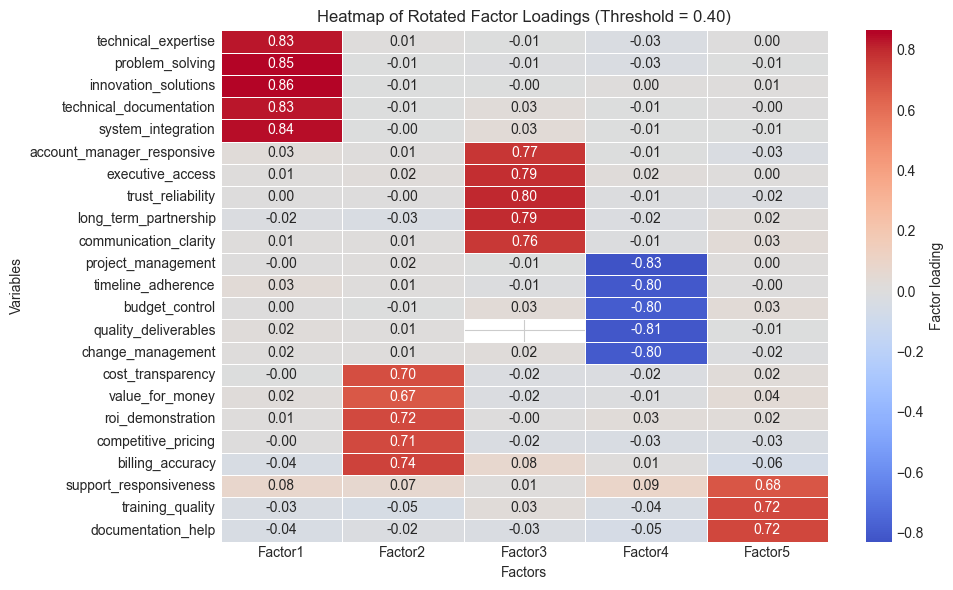

In [30]:
THRESHOLD = 0.00009

df_heatmap = df_rotado.copy()
df_heatmap[np.abs(df_heatmap) < THRESHOLD] = np.nan

plt.figure(figsize=(10, 6))
sns.heatmap(
    df_heatmap,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Factor loading'}
)

plt.title("Heatmap of Rotated Factor Loadings (Threshold = 0.40)")
plt.xlabel("Factors")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

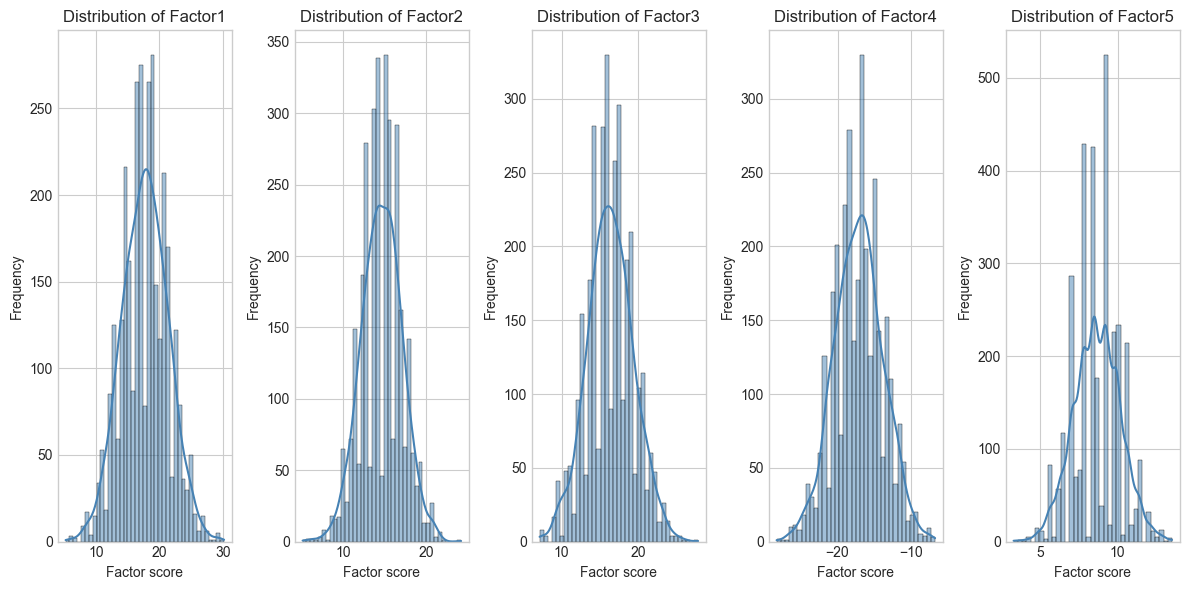

In [29]:
factor_scores = np.dot(datos, Lambda_rot_1)
factor_scores = pd.DataFrame(
    factor_scores,
    columns=[f'Factor{i+1}' for i in range(Lambda_rot_1.shape[1])]
)

# Plot distributions of factor scores
plt.figure(figsize=(12, 6))
for i, col in enumerate(factor_scores.columns, 1):
    plt.subplot(1, factor_scores.shape[1], i)
    sns.histplot(factor_scores[col], kde=True, color='steelblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel("Factor score")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Part 3: Interpretation and Business Application

In [31]:
extraer_variables = df_rotado.T
for i in range(extraer_variables.shape[0]):
    print(f"\nVariables associated to Factor {i+1}:")
    vars_factor = extraer_variables.columns[extraer_variables.iloc[i].abs() > 0.4].tolist()
    print(vars_factor)



Variables associated to Factor 1:
['technical_expertise', 'problem_solving', 'innovation_solutions', 'technical_documentation', 'system_integration']

Variables associated to Factor 2:
['cost_transparency', 'value_for_money', 'roi_demonstration', 'competitive_pricing', 'billing_accuracy']

Variables associated to Factor 3:
['account_manager_responsive', 'executive_access', 'trust_reliability', 'long_term_partnership', 'communication_clarity']

Variables associated to Factor 4:
['project_management', 'timeline_adherence', 'budget_control', 'quality_deliverables', 'change_management']

Variables associated to Factor 5:
['support_responsiveness', 'training_quality', 'documentation_help']


In [32]:
# --- Comunalidades y unicidades ---
communalities = np.sum(Lambda_rot**2, axis=1)
uniqueness = 1 - communalities

pd.DataFrame({
    'Comunalidad (h^2)': communalities,
    'Unicidad (ψ)': uniqueness
}, index=datos.columns)

Comunalidad (h^2)  Unicidad (ψ)
technical_expertise                  0.716433      0.283567
problem_solving                      0.734313      0.265687
innovation_solutions                 0.740688      0.259312
technical_documentation              0.722566      0.277434
system_integration                   0.733079      0.266921
account_manager_responsive           0.609093      0.390907
executive_access                     0.626106      0.373894
trust_reliability                    0.635959      0.364041
long_term_partnership                0.621818      0.378182
communication_clarity                0.620295      0.379705
project_management                   0.698210      0.301790
timeline_adherence                   0.683381      0.316619
budget_control                       0.678279      0.321721
quality_deliverables                 0.682880      0.317120
change_management                    0.672618      0.327382
cost_transparency                    0.506073      0.493927
value_for_money                      0.469446      0.530554
roi_demonstration                    0.511893      0.488107
competitive_pricing                  0.504873      0.495127
billing_accuracy                     0.540911      0.459089
support_responsiveness               0.491731      0.508269
training_quality                     0.515728      0.484272
documentation_help                   0.508348      0.491652

In [33]:
# --- Puntuaciones factoriales estimadas ---
fa_scores = fa.transform(datos_num)
pd.DataFrame(fa_scores, columns=['Factor1','Factor2','Factor3','Factor4','Factor5'])

c:\Users\eduar\Documents\Github julio\FA\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Factor1   Factor2   Factor3   Factor4   Factor5
0     0.959843  1.404497  0.431661  0.125548 -1.928740
1    -0.044928 -0.954096  1.479810 -1.720484 -0.813029
2    -0.840509 -0.435911  0.584759 -0.924871 -0.426999
3    -1.276649 -0.008866 -1.874288 -0.487404 -0.213267
4     1.008224 -0.956399  0.360725 -0.353866 -0.306633
...        ...       ...       ...       ...       ...
3230  0.730928 -0.440380 -0.824234  0.786235 -0.447824
3231 -0.326180  0.628638  0.186484 -0.460998 -0.270765
3232  1.032434 -1.271591 -2.082890 -1.189568  0.629732
3233 -0.644648  0.674645 -0.282249  0.160099 -0.434742
3234 -0.723350 -0.102990 -0.975672  1.471957 -0.447980

[3235 rows x 5 columns]

In [34]:
variance = fa.get_factor_variance()
varianza_df = pd.DataFrame({
    'Variance': variance[0],
    'Proportion': variance[1],
    'Cumulative': variance[2]
}, index=[f'Factor_{i+1}' for i in range(5)])

print("\n Varianza explicada por factor:")
print(varianza_df.round(3))


 Varianza explicada por factor:
          Variance  Proportion  Cumulative
Factor_1     8.747       0.380       0.380
Factor_2     1.776       0.077       0.457
Factor_3     1.425       0.062       0.519
Factor_4     1.204       0.052       0.572
Factor_5     1.073       0.047       0.618


In [35]:
loads = pd.DataFrame(Lambda_rot, index=datos.columns, columns=['Factor1','Factor2','Factor3','Factor4','Factor5'])


customers_factors = pd.DataFrame(
    fa_scores,
    index=datos.index,  
    columns=loads.columns
)

In [36]:
outcome_data = df.loc[datos.index, outcome_cols].copy()

results = {}
factor_importances = pd.DataFrame()

for outcome_col in outcome_cols:
    y = outcome_data[outcome_col]
    X = customers_factors

    # Dividir en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Entrenar el modelo
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)

    # Evaluation
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store results
    results[outcome_col] = {'R²': r2, 'RMSE': rmse, 'model': model}
    coefs = pd.Series(model.coef_, index=X.columns)
    factor_importances[outcome_col] = coefs.abs()

    print(f"Results for {outcome_col}:")
    print(f"  R²: {r2:.3f}")
    print(f"  RMSE: {rmse:.3f}")
    print("-" * 20)

Results for overall_satisfaction:
  R²: 0.620
  RMSE: 0.507
--------------------
Results for nps_score:
  R²: 0.307
  RMSE: 1.463
--------------------
Results for renewal_likelihood:
  R²: 0.404
  RMSE: 0.607
--------------------
Results for revenue_growth_pct:
  R²: 0.612
  RMSE: 5.240
--------------------
Results for referrals_generated:
  R²: 0.241
  RMSE: 1.309
--------------------


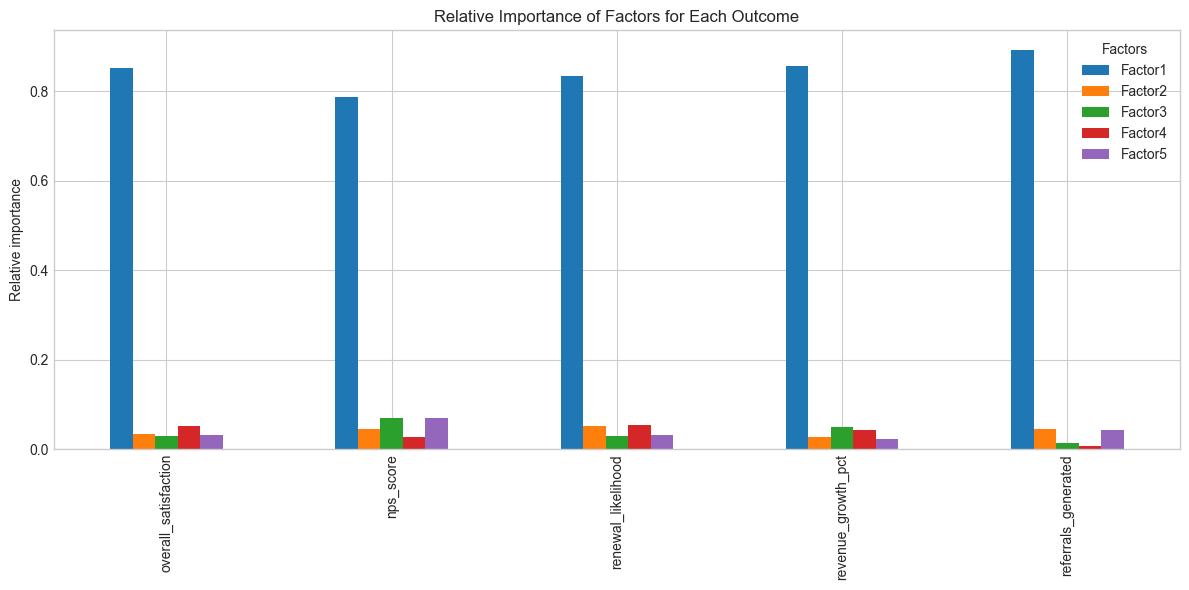

In [40]:
factor_importances_norm = factor_importances.div(factor_importances.sum(axis=0), axis=1)

factor_importances_norm.T.plot(kind='bar', figsize=(12,6))
plt.ylabel("Relative importance")
plt.title("Relative Importance of Factors for Each Outcome")
plt.legend(title="Factors")
plt.tight_layout()
plt.show()

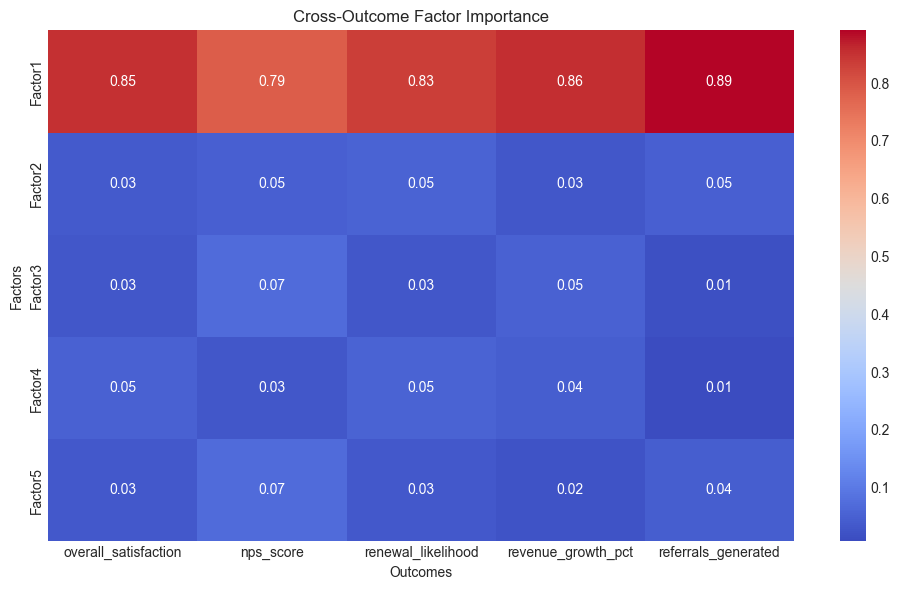

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(factor_importances_norm, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cross-Outcome Factor Importance")
plt.xlabel("Outcomes")
plt.ylabel("Factors")
plt.tight_layout()
plt.show()

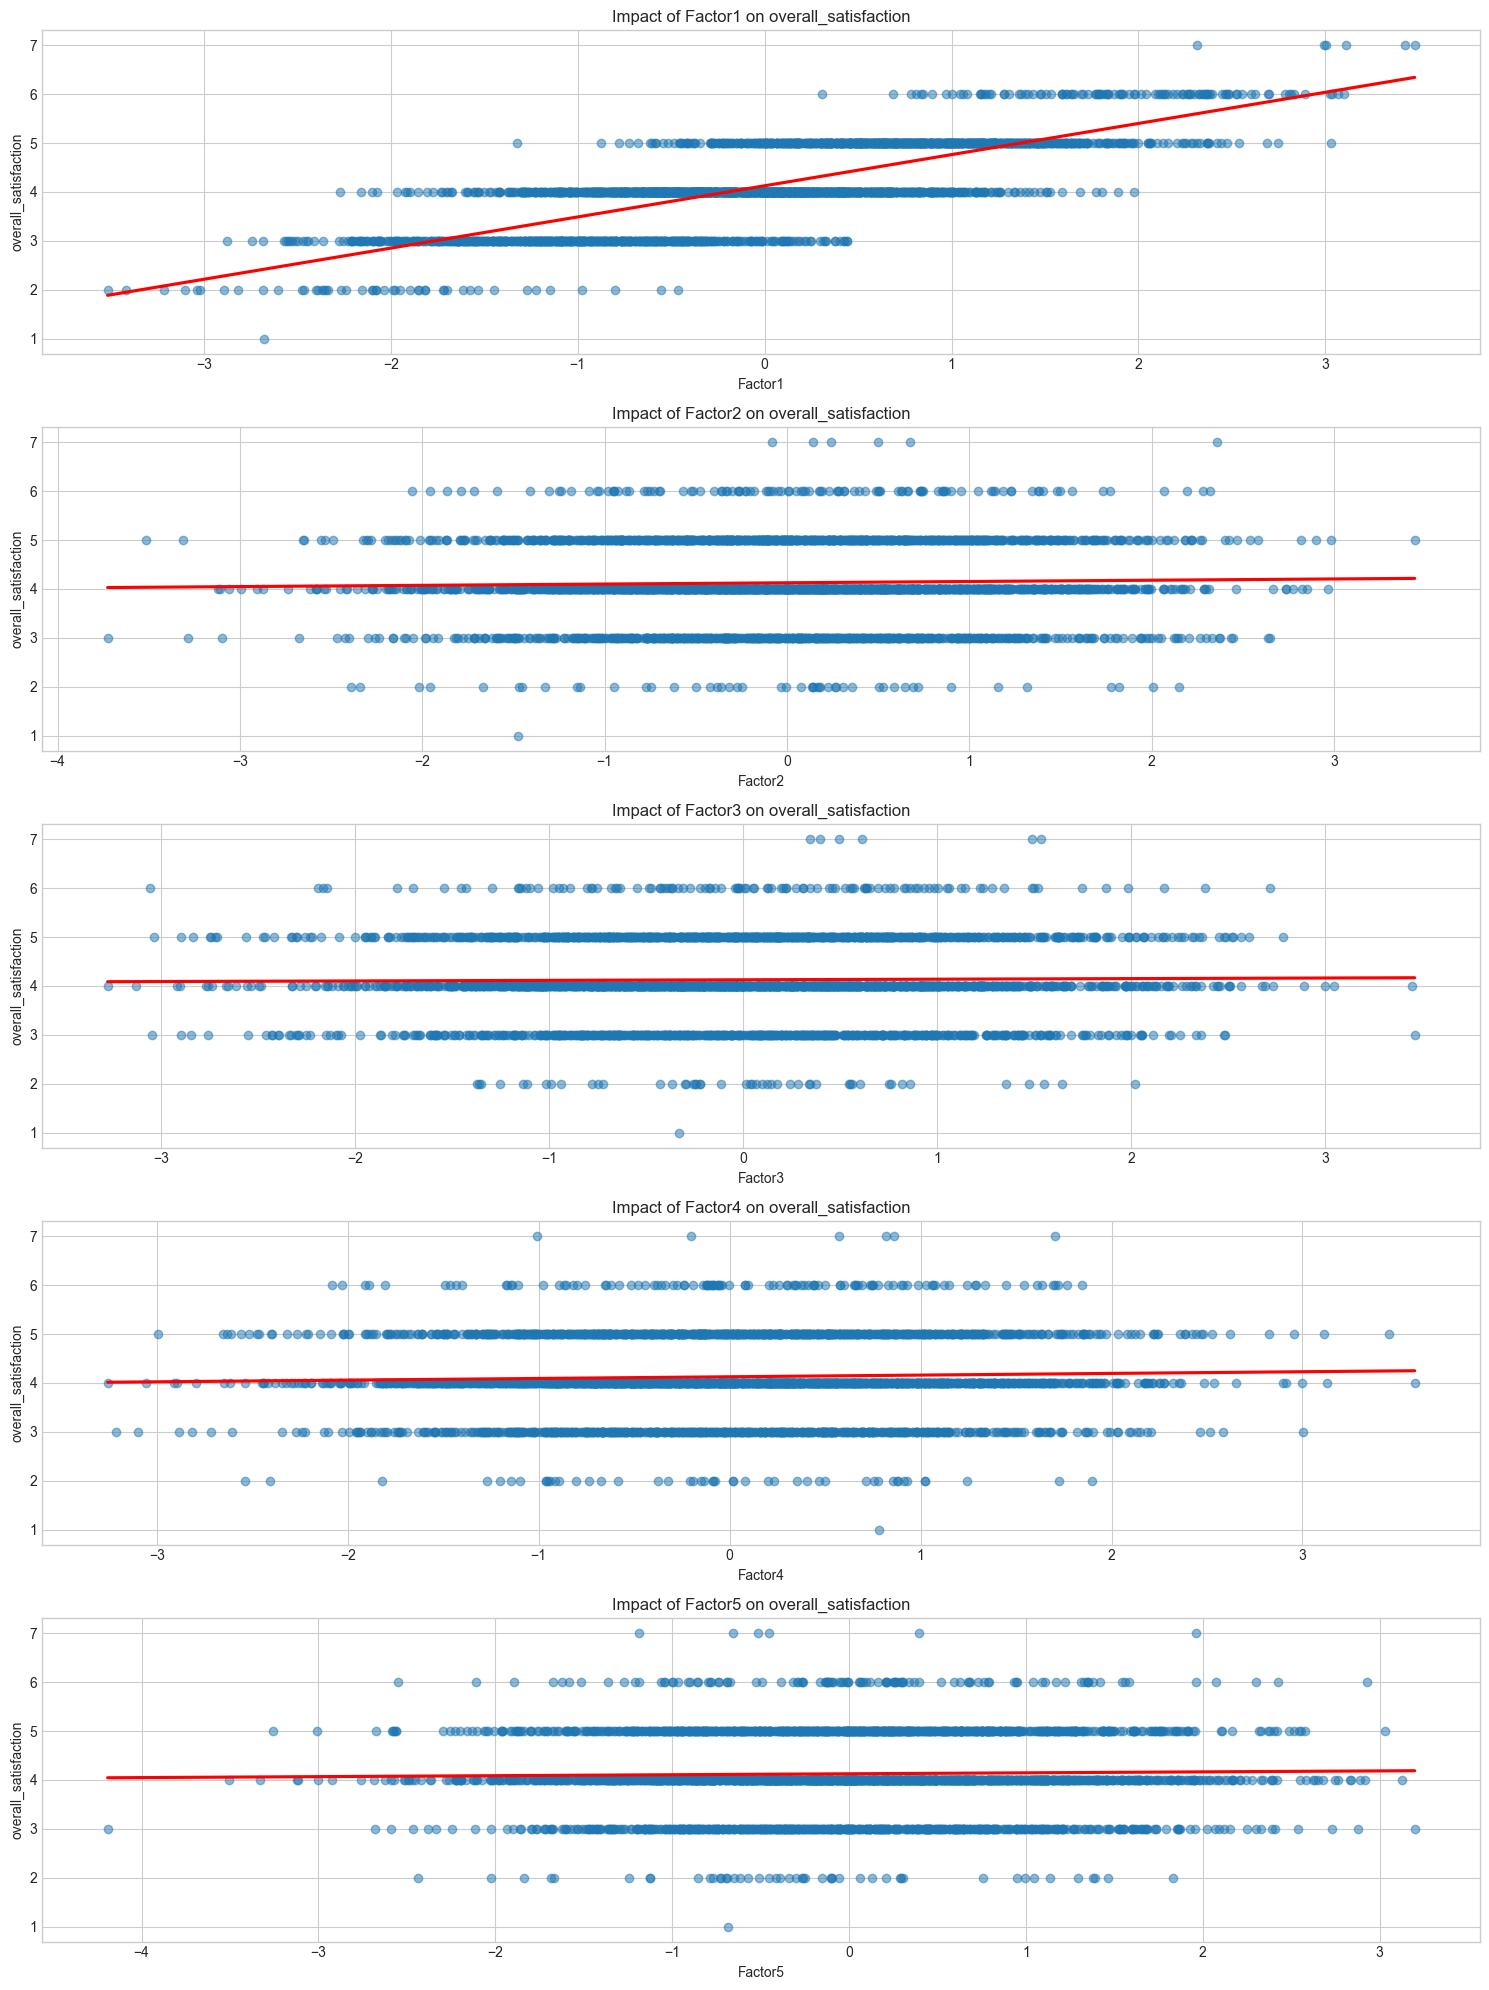

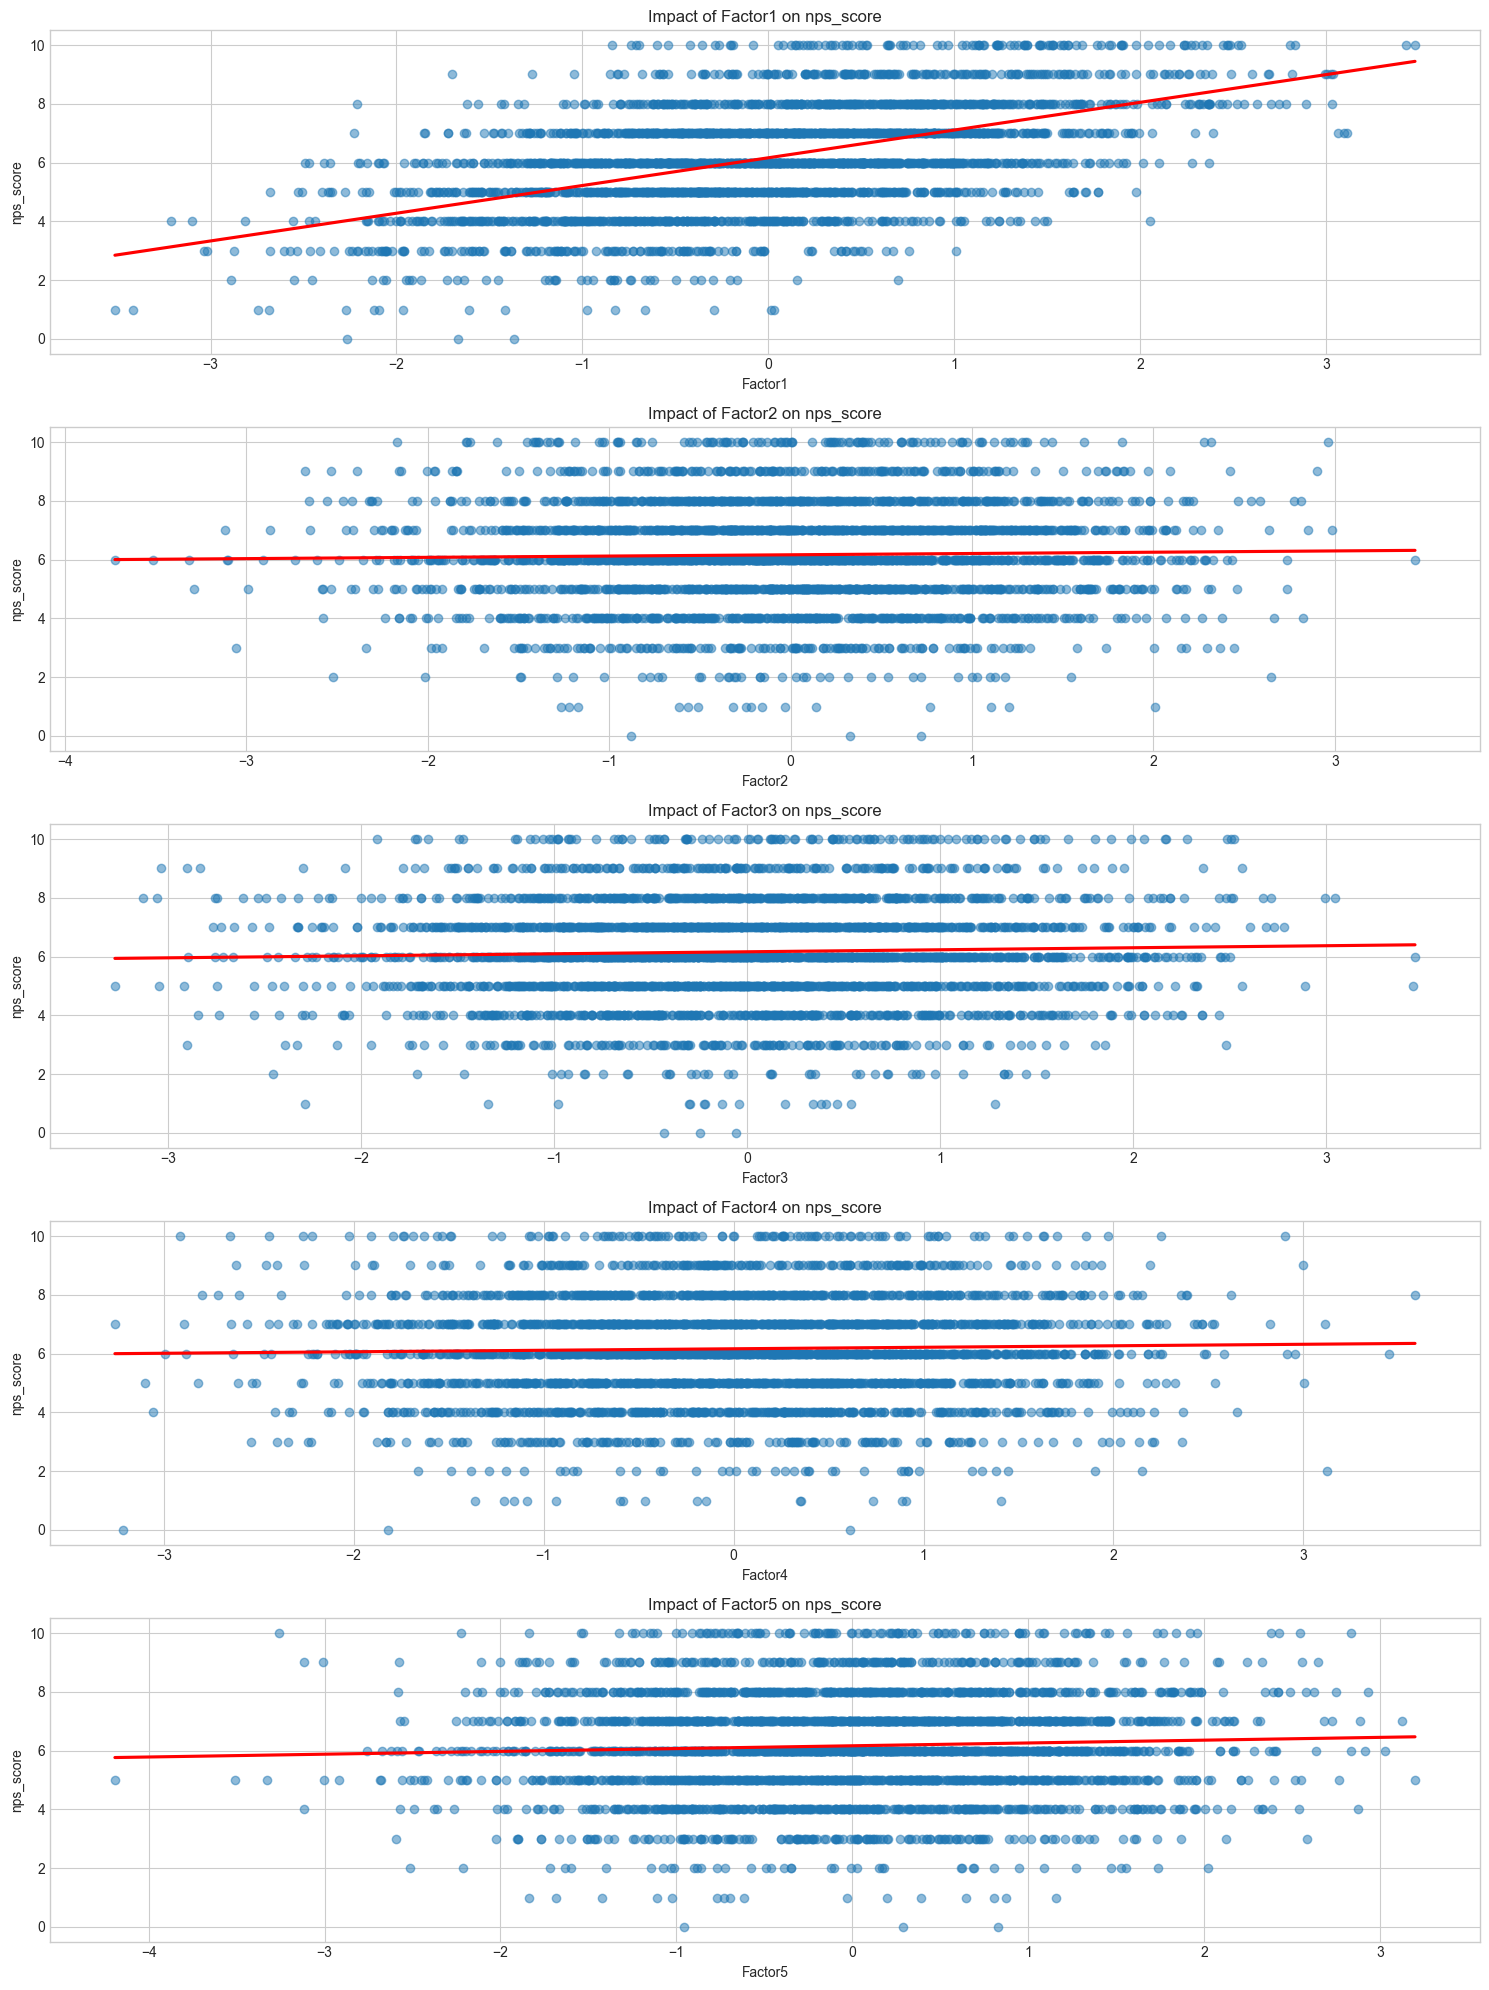

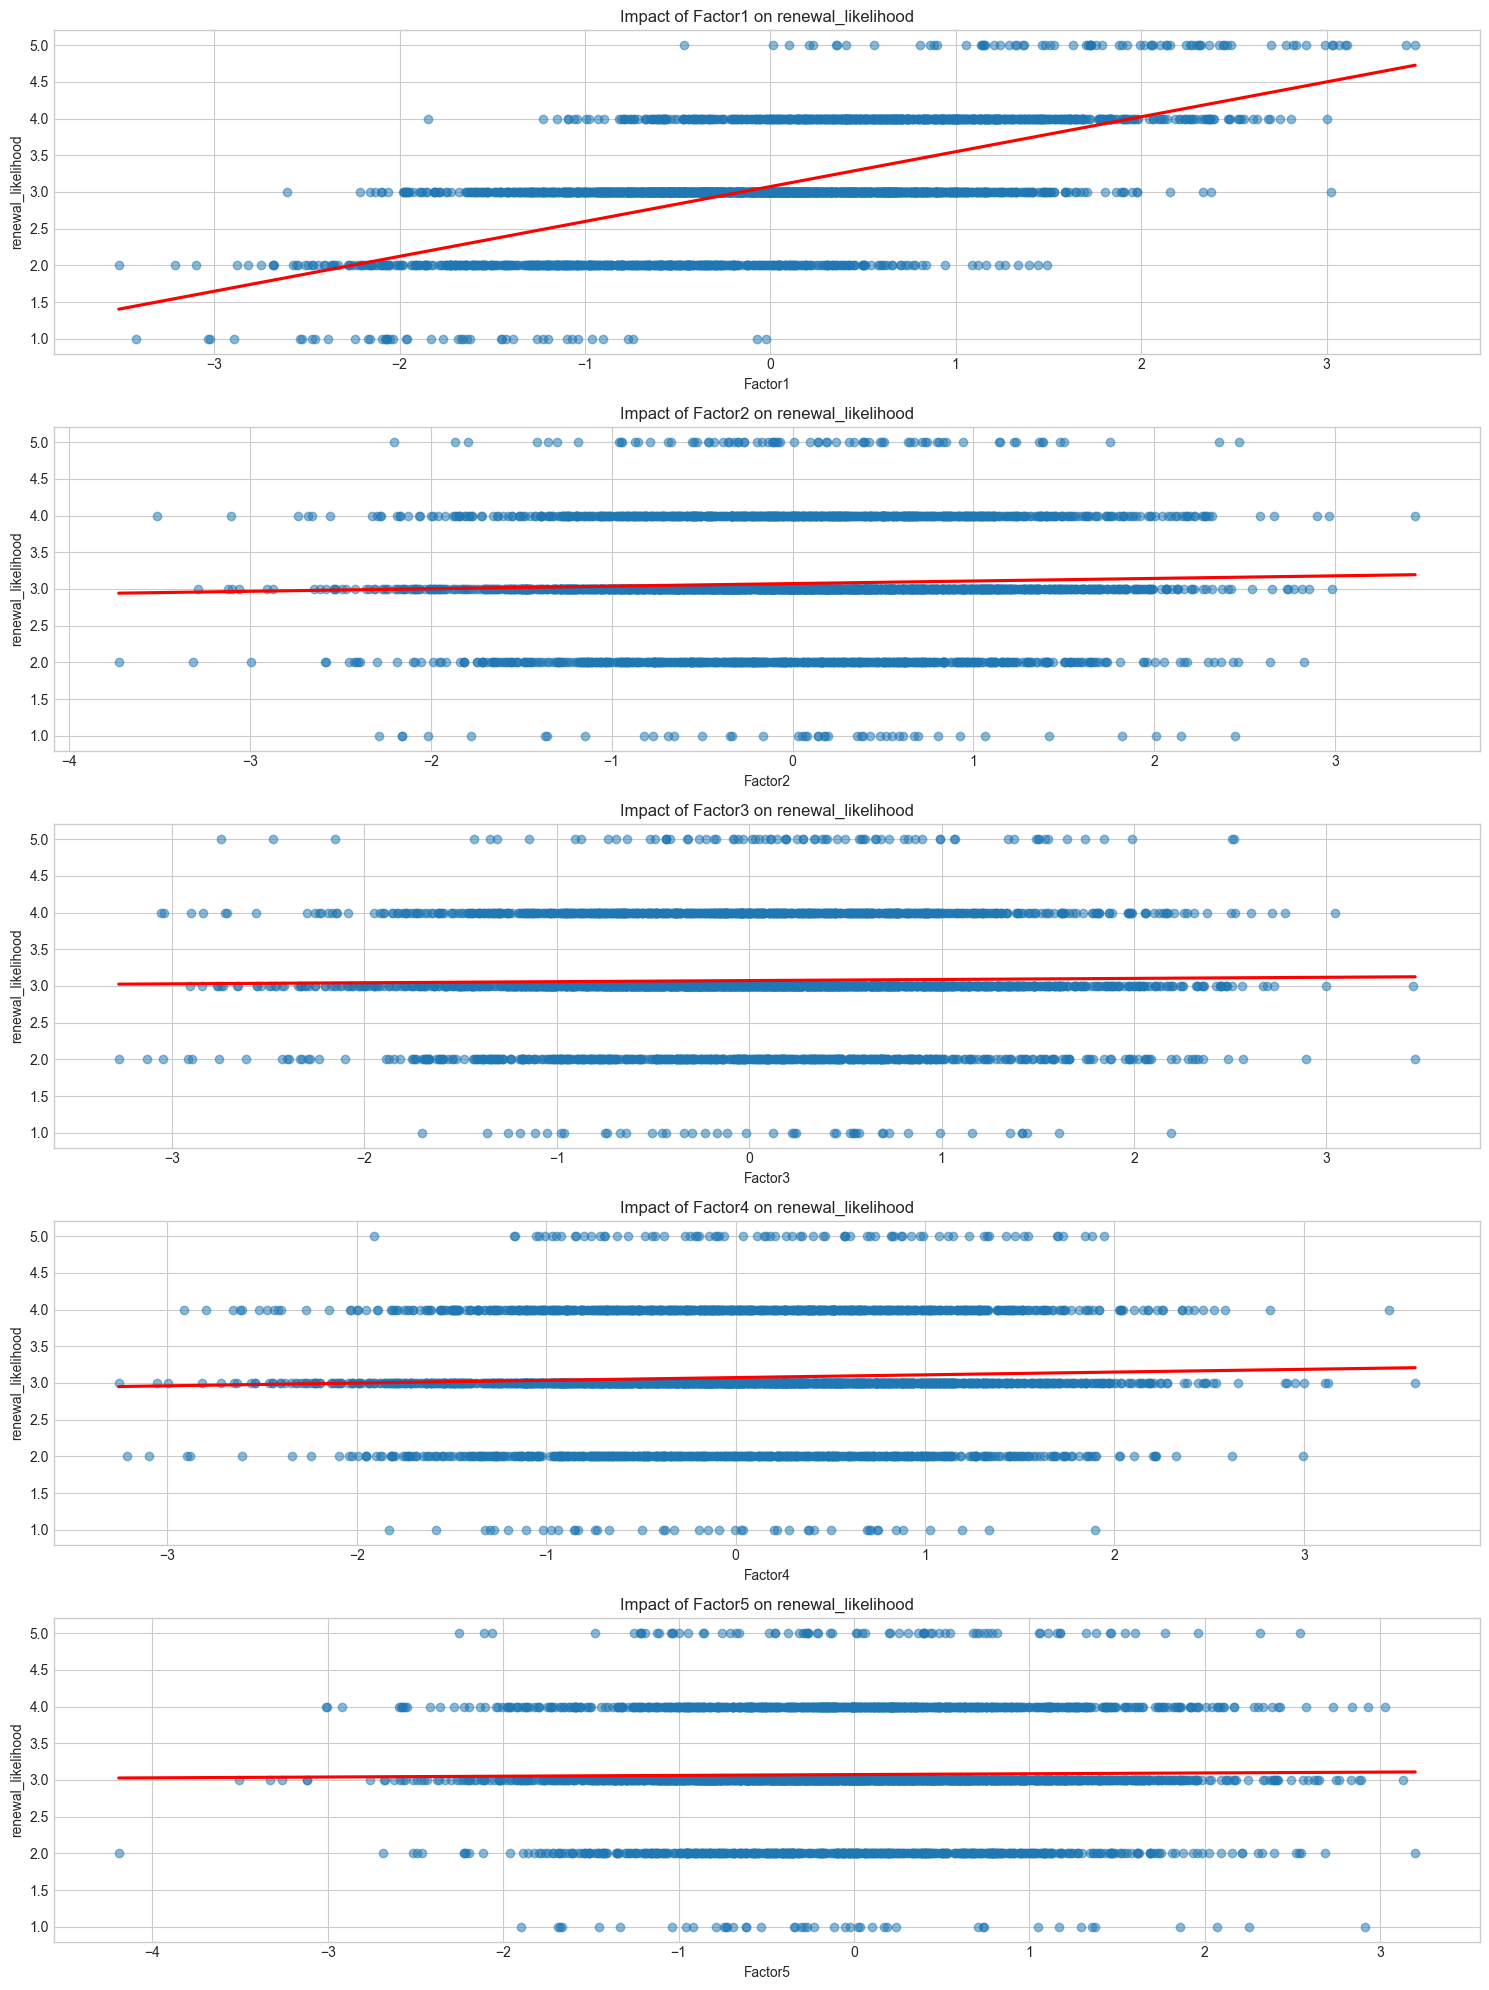

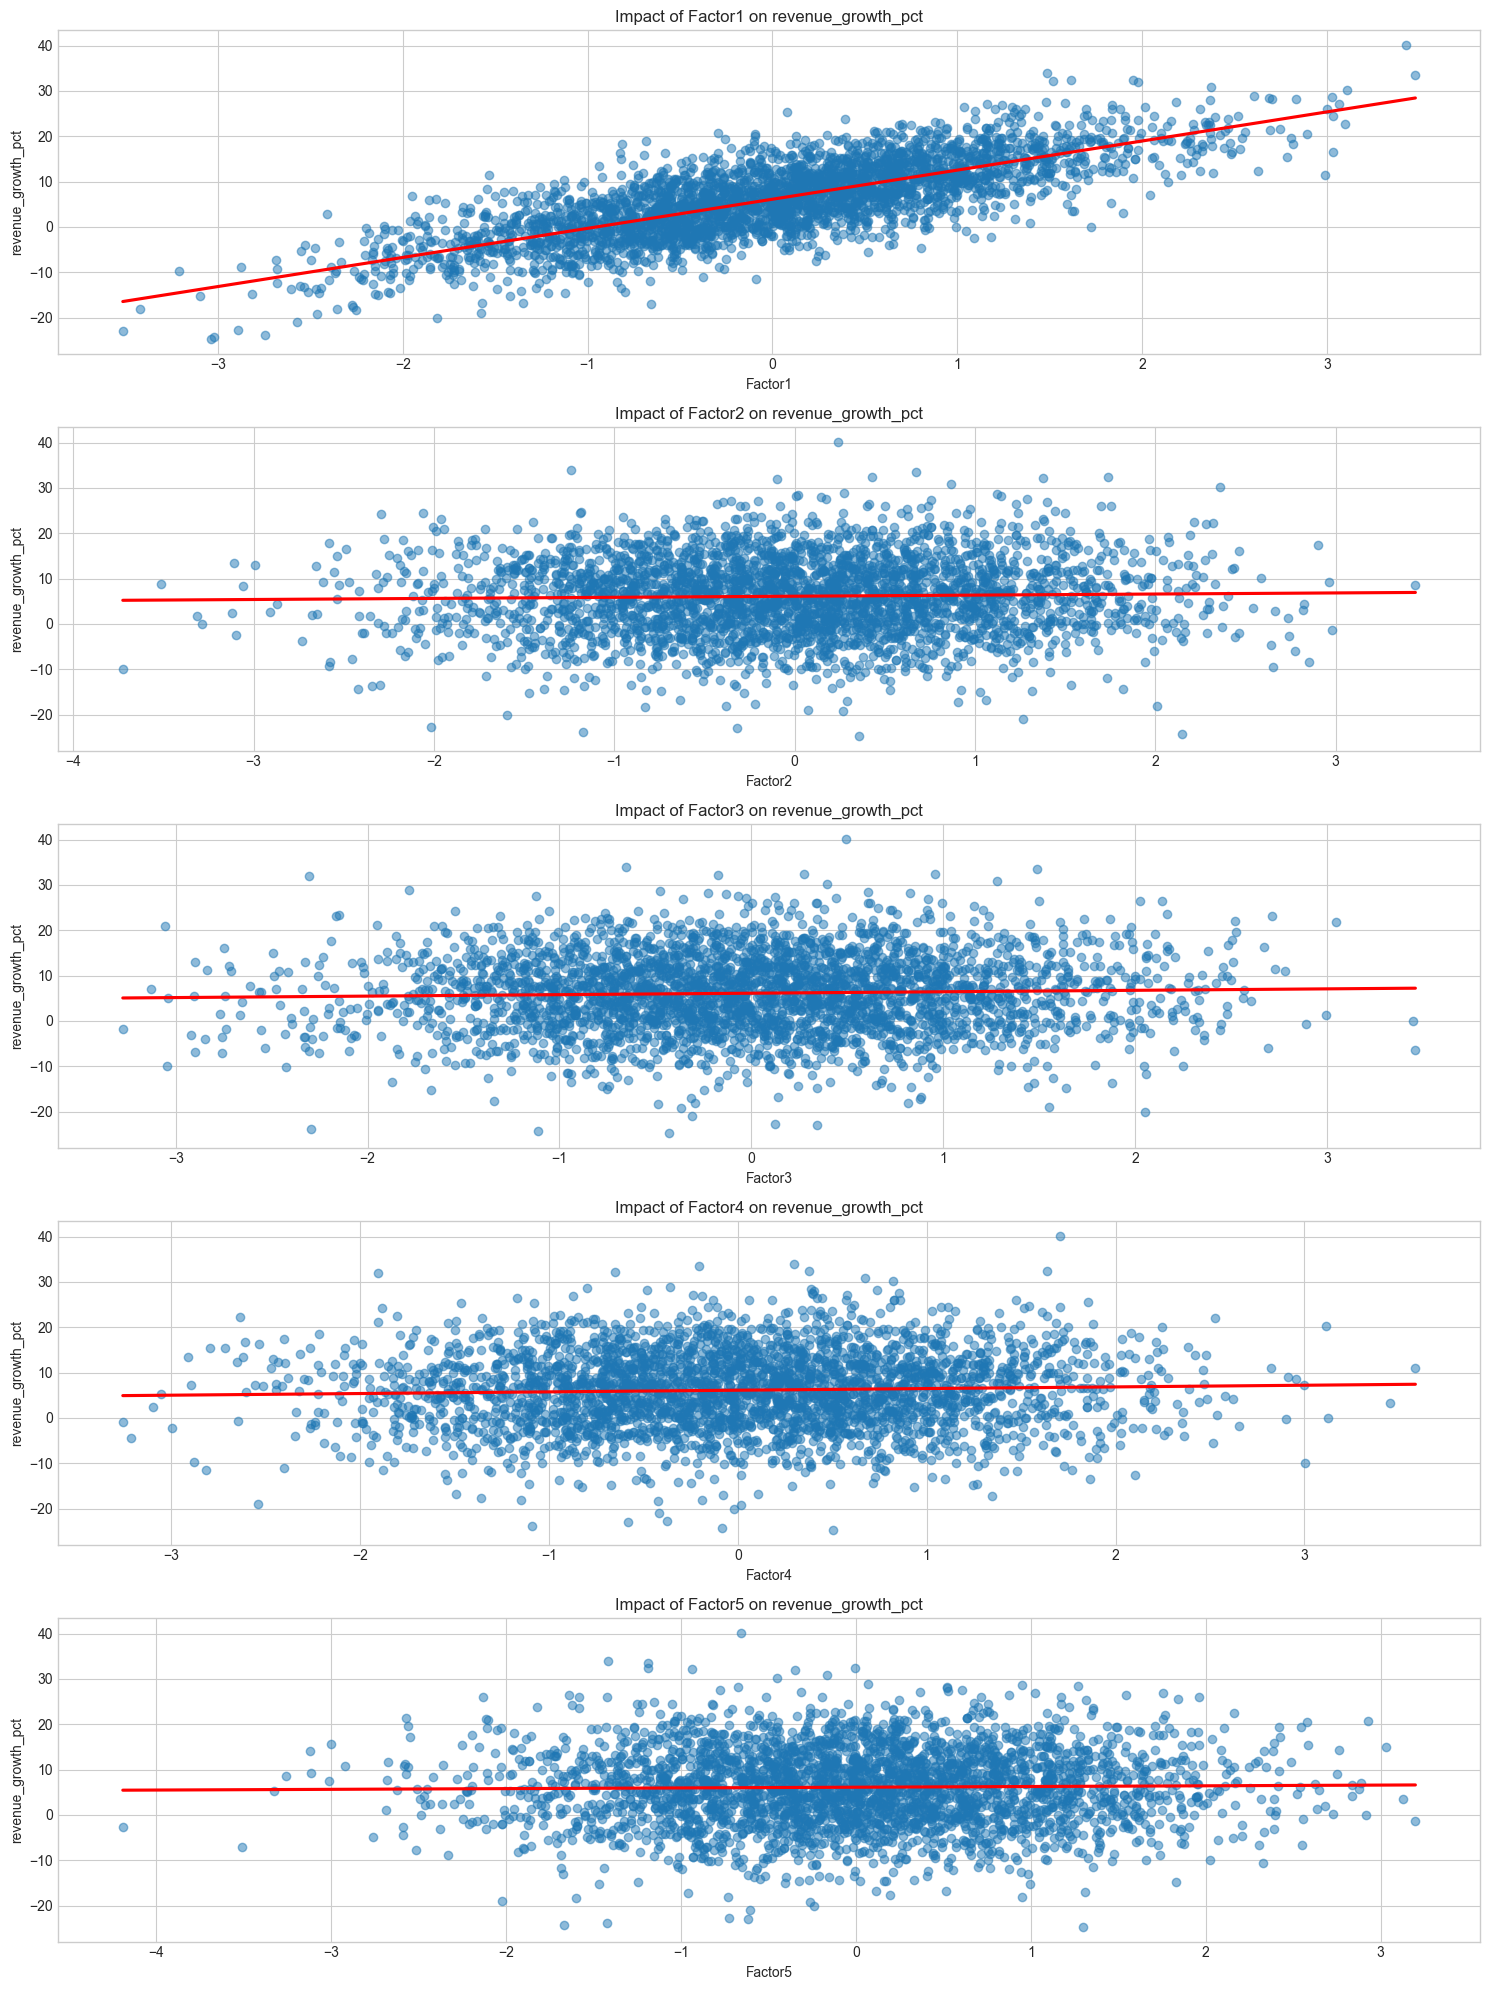

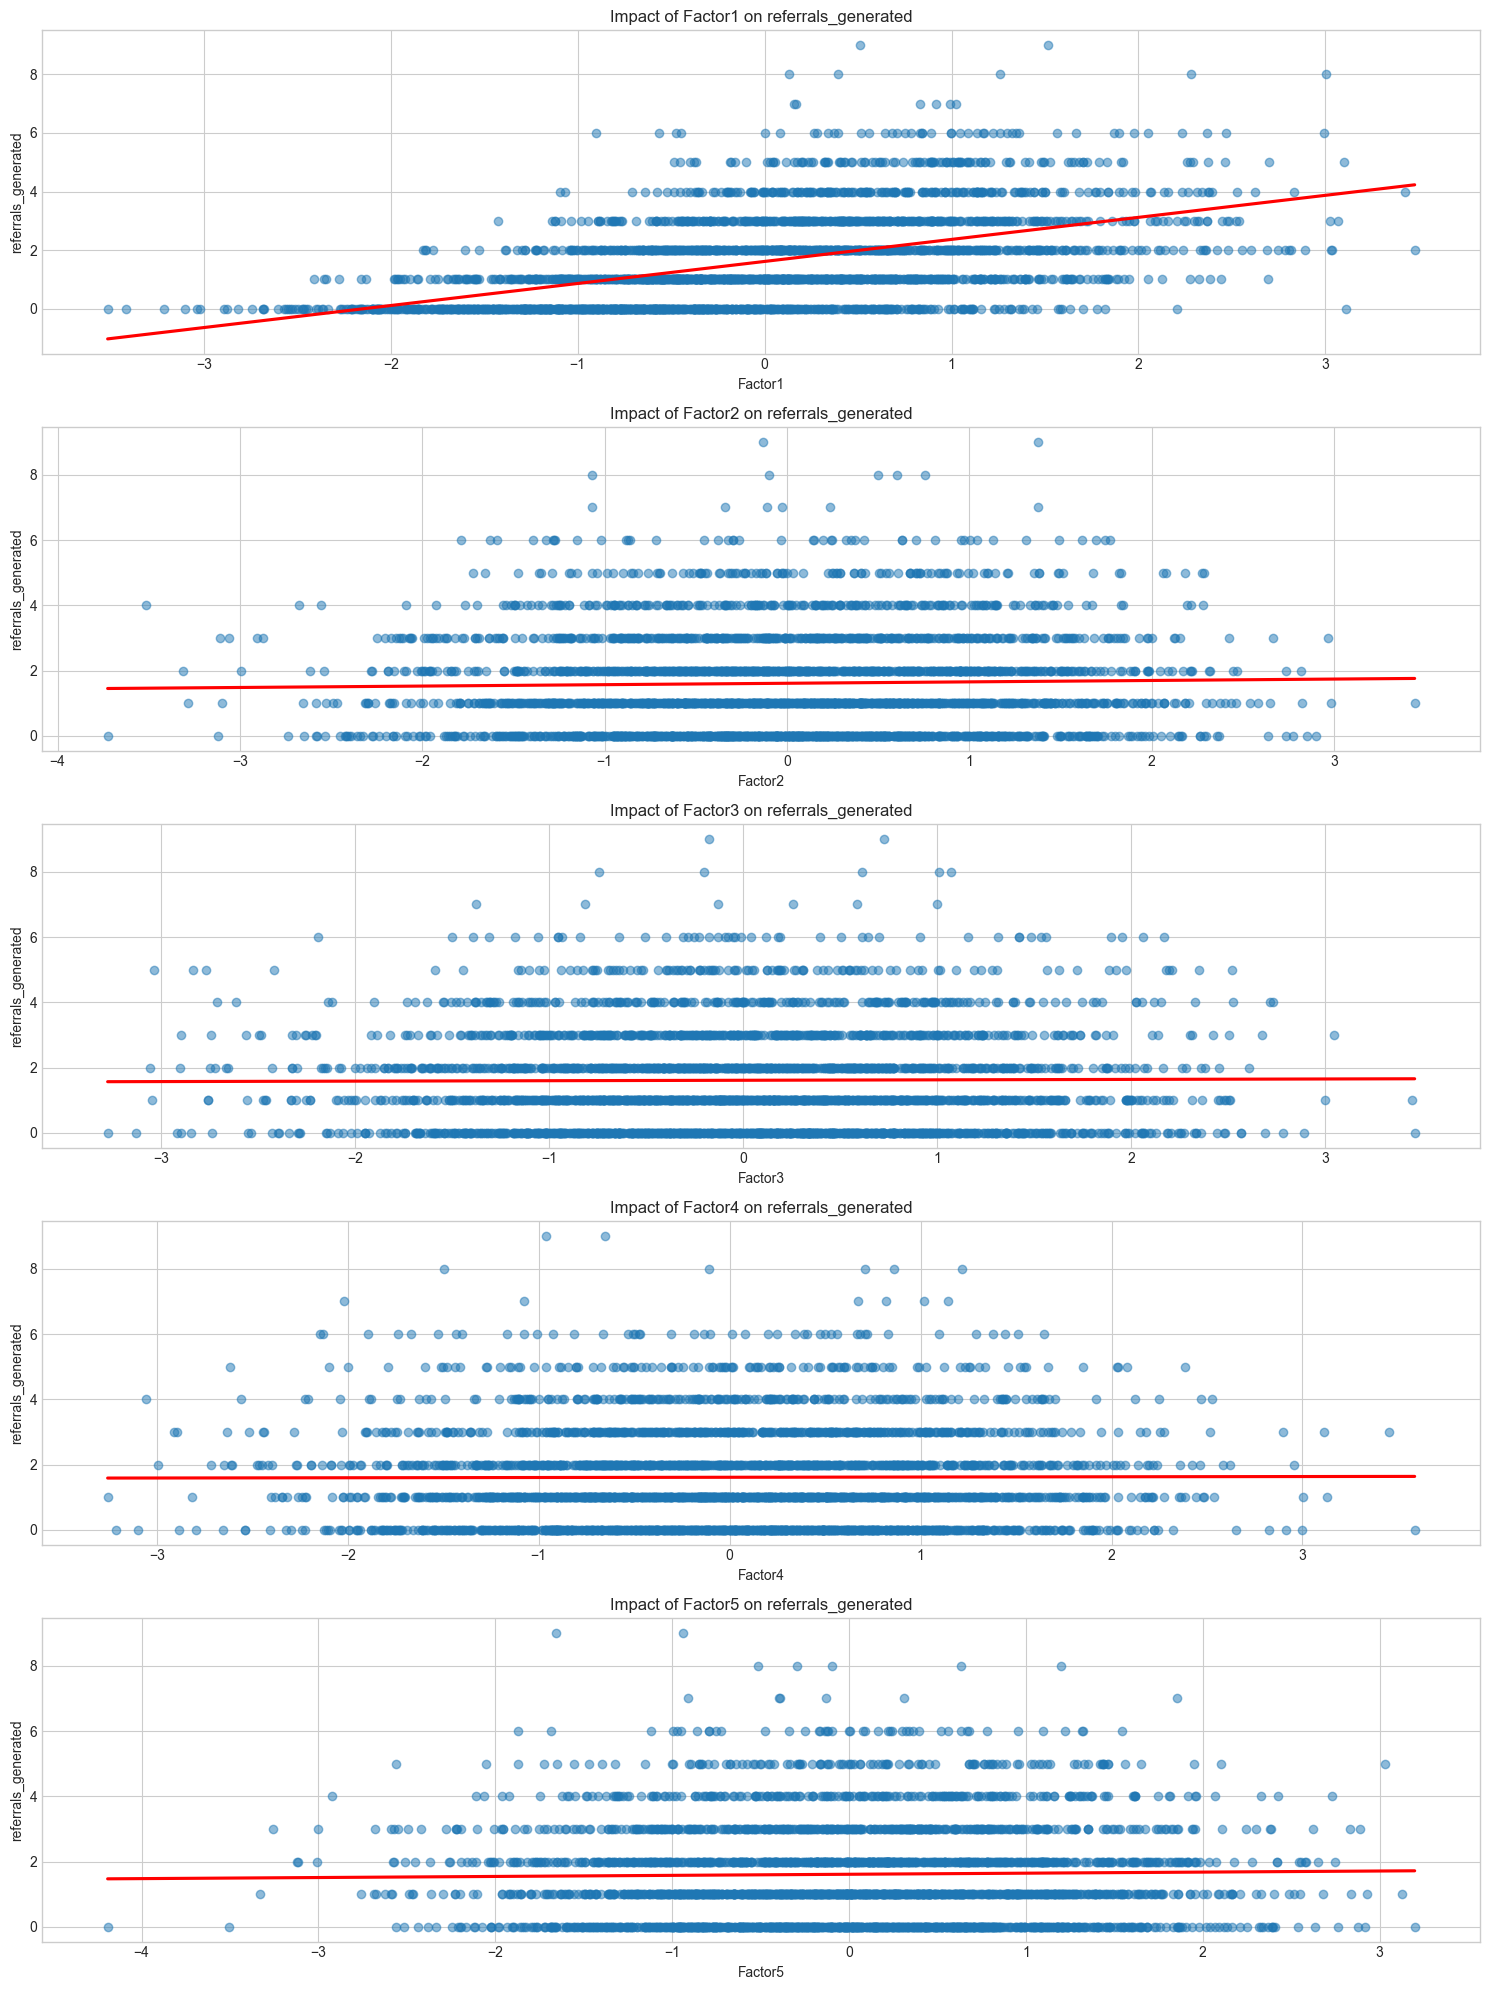

In [39]:

for outcome_col in outcome_cols:
    y = outcome_data[outcome_col]
    X = customers_factors

    plt.figure(figsize=(15, 4 * X.shape[1]))
    
    for i, factor in enumerate(X.columns, 1):
        plt.subplot(X.shape[1], 1, i)
        sns.regplot(x=X[factor], y=y, ci=None, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
        plt.title(f"Impact of {factor} on {outcome_col}")
        plt.xlabel(factor)
        plt.ylabel(outcome_col)
    
    plt.tight_layout()
    plt.show()

Both impact and relative importance analyses indicate "Factor1" (Technical Excellence & Innovation) as the most influential factor affecting the outcome variables. The remaining factors have a negligible impact on the outcome variables.

## Team Information
**Members:**
- [César Isao Pastelin Kohagura] ([A01659947]) - Factor interpretation and business insights
- [Eduardo Botello Casey] ([A01659281]) - Data exploration and factor extraction
- [Luis Emilio Fernández González] ([A01659517]) - Visualization and recommendations
**Deliverable Links:**
- **Presentation Video:** https://youtu.be/2HwcW30IK-M
- **Executive Summary:** [Available on Canvas]
- **Dataset:** `customer_satisfaction_data.csv`
**Completion Date:** [21/10/2025]